# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

* * *

Для поиска похожих пользователей воспользуемся функцией **sklearn.metrics.pairwise_distances** с косинусной метрикой, которая вернет матрицу **$A$** косинусных расстояний между векторами - элементы матрицы **a<sub>ij</sub>** равны разности **(1 - cos &alpha;<sub>ij</sub> )**, где **&alpha;<sub>ij</sub>** - угол между **i**-ым и **j**-м векторами (строками) матрицы пользователей **raitings**. Соответственно, чем меньше будет значение элемента **a<sub>ij</sub>**, тем более схожими будут векторы **i** и **j** матрицы пользователей **raitings**.

In [31]:
from sklearn.metrics import pairwise_distances
A = pairwise_distances(raitings, metric="cosine")
A

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [62]:

for i, row in enumerate(A):
    j=list(row).index(min(row[np.nonzero(row)]))
    print(f"""Для {i+1}-го пользователя наиболее похожим будет {j+1}-ый пользователь, т.к. угол между их векторами
наименьший и равен {np.rad2deg(np.arccos(1 - min(row[np.nonzero(row)]))): .2f} градусам. Их оценки:""")
    print(f'\t {i+1}-ый: {raitings[i]}')
    print(f'\t {j+1}-ый: {raitings[j]}')

Для 1-го пользователя наиболее похожим будет 9-ый пользователь, т.к. угол между их векторами
наименьший и равен  24.40 градусам. Их оценки:
	 1-ый: [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
	 9-ый: [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
Для 2-го пользователя наиболее похожим будет 5-ый пользователь, т.к. угол между их векторами
наименьший и равен  29.38 градусам. Их оценки:
	 2-ый: [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
	 5-ый: [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
Для 3-го пользователя наиболее похожим будет 10-ый пользователь, т.к. угол между их векторами
наименьший и равен  23.26 градусам. Их оценки:
	 3-ый: [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
	 10-ый: [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
Для 4-го пользователя наиболее похожим будет 10-ый пользователь, т.к. угол между их векторами
наименьший и равен  30.81 градусам. Их оценки:
	 4-ый: [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]
	 10-ый: [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
Для 5-го по

In [86]:
# На всякий случай, для проверки найду "вручную" угол между двумя векторами. 
# Например, пусть это будут raitings[3] и raitings[6] (т.е. соответственно 4-ый и 7-ой пользователи)
from numpy import linalg as LA
cos_xy = np.dot(raitings[3],raitings[6]) / (LA.norm(raitings[3]) * LA.norm(raitings[6]))
cos_xy
np.degrees(np.arccos(cos_xy))
# Результат соответствует полученному с помощью sklearn.metrics.pairwise_distances

33.61854221212546

Для сжатия признаковых описаний пользователя можно воспользоваться, например, функцией **sklearn.decomposition.PCA**.

In [69]:
from sklearn.decomposition import PCA
# Зададим в переменную X исходный массив данных  
X = raitings
# Задаем количество компонентов, которое должны получить
pca = PCA(n_components=5)
# Обучаем модель
pca.fit(X)
# Получаем новый массив признаковых описаний с заданной нами размерностью
X1 = pca.transform(X)
X1

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [70]:
# Если попробовать восстановить данные, то значение оценок пользователей будут достаточно сильно искажены. Все-таки
# сжатие с 15 до 5 компонентов ведет к потере части информации.
X_restored = pca.inverse_transform(X1)
X_restored

array([[ 1.2713466 ,  3.66929429,  8.35533805,  4.64369476,  1.79511984,
         7.27906297,  9.45356511,  7.01655415,  7.78461261,  6.29814277,
         8.43027428,  1.67837018,  7.89228549,  5.45763733,  5.95151941],
       [ 7.53605189,  3.41414275,  4.43971325,  9.20015737,  6.99666333,
         8.77754015,  9.12804918,  4.52818336,  4.87902514,  2.23442732,
        -0.51011256,  4.55094941,  7.7114987 ,  7.51265934,  6.59070107],
       [ 3.39964951,  3.97299823,  9.32966715,  7.42399391,  4.69196275,
         7.43824801,  3.52765326,  8.1399885 , 10.63557207,  5.0218547 ,
         3.36558945,  6.43949662,  8.09170516,  2.50854146,  8.09680645],
       [ 6.64195784,  2.43652674,  8.28046315,  8.02355022,  5.16047344,
         9.46865286,  2.62484677,  2.98636192,  5.65024453,  1.27650795,
         6.26004426,  7.50362367,  3.41229296,  1.90027514,  5.74418711],
       [ 5.15158638,  5.73004246,  3.88061769,  5.70006536,  7.27463239,
         7.39000151, 10.09210812,  7.01253378, 

In [71]:
# Для сравнения исходная матрица
raitings

array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
       [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
       [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
       [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
       [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
       [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
       [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
       [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
       [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
       [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [90]:
# Проверим как работатет функция sklearn.decomposition.TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
svd.fit(X)
X2 = svd.transform(X)
X2

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

In [91]:
X_restored2 = svd.inverse_transform(X2)
X_restored2
# Чуда не произошло. Результаты также не впечатляют.

array([[ 1.87714353,  6.41126887,  7.05045587,  6.47383192,  4.67524539,
         6.48697165,  8.36593621,  6.97087173,  7.70088673,  5.51734813,
         7.66313349,  1.17415544,  8.18177703,  4.93941174,  7.05221611],
       [ 8.47218818,  2.54514441,  5.55092788,  9.47008358,  6.66745215,
         9.91611082, 10.02905716,  4.77370255,  5.34878676,  2.59112002,
         0.28227787,  5.6674572 ,  7.96546466,  8.3838966 ,  6.78320366],
       [ 2.68479305,  3.95864181,  8.73709327,  6.80481999,  4.288088  ,
         6.46413823,  3.09710517,  7.99183396, 10.38855674,  4.90995872,
         3.05256946,  5.74171095,  7.84949196,  2.06008353,  7.77964793],
       [ 6.54449207,  2.65799371,  7.76817933,  7.97515383,  5.2821603 ,
         8.60104295,  2.28697414,  2.8817624 ,  5.5791163 ,  1.05583181,
         6.10320271,  7.16789157,  3.32776546,  1.68019326,  5.82743203],
       [ 4.29012286,  5.45203499,  3.41606541,  4.86724143,  6.55299609,
         6.58571961,  9.7515166 ,  6.84852339, 

## Задание 2
Вычислите производную **<i>tg<sup>2</sup>(sin(x) + cos(2x + 3))</i>**  в точке **x<sub>0</sub> = 1**  (на python и на бумаге).

***

Cначала посчитаем производную "вручную".
$$ f(x)' = 2tg(sin(x) + cos(2x + 3))(tg(sin(x) + cos(2x + 3)))' = \frac{2tg(sin(x) + cos(2x + 3))(sin(x) + cos(2x + 3))'} {cos(sin(x) + cos(2x + 3))}=$$ 
<br>
$$=\frac{2tg(sin(x) + cos(2x + 3))(cos(x) -2sin(2x + 3))}{cos^2(sin(x) + cos(2x + 3))}$$


Теперь проверим как найдет производную Python:

In [72]:
# Найдем производные с помощью Python использую библиотеку sympy
from sympy import *
# создаем "символ" под названием x
x = Symbol('x')

# Определяем в переменную f нашу функцию
f = tan(sin(x) + cos(2*x + 3))**2

# Находим первую производную
f_derivative = f.diff(x)
f_derivative

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

Python вывел решение без дроби, т.к. использовал пифагорово тождество
$$
(tg(x))'=\frac{1}{cos^2x}=tg^2x+1
$$
но по сути результат тот же

In [73]:
fd = lambdify(x, f_derivative)
print('Значение производной в точке x=1 равно ',fd(1))

Значение производной в точке x=1 равно  55.385917635337854


Еще проверим производную, полученную "вручную"

In [80]:
x0 = 1
r=2*np.tan(np.sin(x0) + np.cos(2*x0 + 3))*(np.cos(x0) - 2*np.sin(2*x0 + 3)) / np.cos(np.sin(x0) + np.cos(2*x0 + 3))**2
print('Значение производной в точке x=1 равно ',r)

Значение производной в точке x=1 равно  55.38591763533786


У результатов расхождение на 13-м знаке после запятой - это видимо сказываются отличия в расчетах тригонометрических функций у разных библиотек. Будем считать, что результат идентичен и производную мы рассчитали правильно

# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [190]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [191]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [192]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

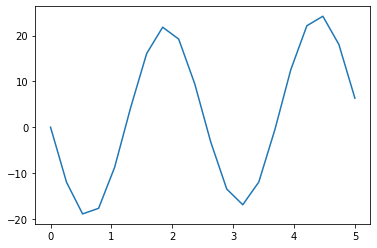

In [193]:
plt.plot(x, fx)
plt.show()

In [167]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Попробуем найти оптимум функции **error** с помощью алгоритма дифференциальной эволюции **scipy.optimize.differential_evolution**. Параметры **a** и **b** будут выступать в качестве переменных. Зададим для каждого из них границы значений от -10 до 10.

In [189]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
# Задаем границы значений переменных params[0] и params[1] (по сути параметров a и b соответственно)
bounds = [(-10, 10), (-10, 10)]

# Попробуем найти оптимум функции error
differential_evolution(error, bounds, seed=42)

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

Т.е. функция **error** сможет принимать значение близкое к $0$ при параметрах **a** $ = 3$ и **b** $ = -2.5$. Проверим это. Теперь найдем оптимум функции **error** с помощью инструмента **scipy.optimize.minimize**. В качестве предполагаемых начальных исходных значений параметров задаим отличные от полученных ранее ( но сохраним знак). Пусть будут  **a** $ = 5$ и **b** $ = -5$.

In [198]:
# Задаем массив предполагаемых занчений переменных
a_b = [5, -5]

# Найдем оптимум функции error с помощью scipy.optimize.minimize. Будет использован метод COBYLA
minimize(error, a_b, method='COBYLA')

     fun: 0.040595553450285315
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 48
  status: 1
 success: True
       x: array([ 3.00006916, -2.50005519])

Не смотря на то, что начальные предполагаемые значения параметров были специально искажены, алгоритм **scipy.optimize.minimize** так же выдал решение близкое к **a** $ = 3$ и **b** $ = -2.5$. 

Теперь подставим эти параметры в нашу функцию **f**. А затем постром ее график и сравним его с исходным (построенным по известным значениям **fx**)

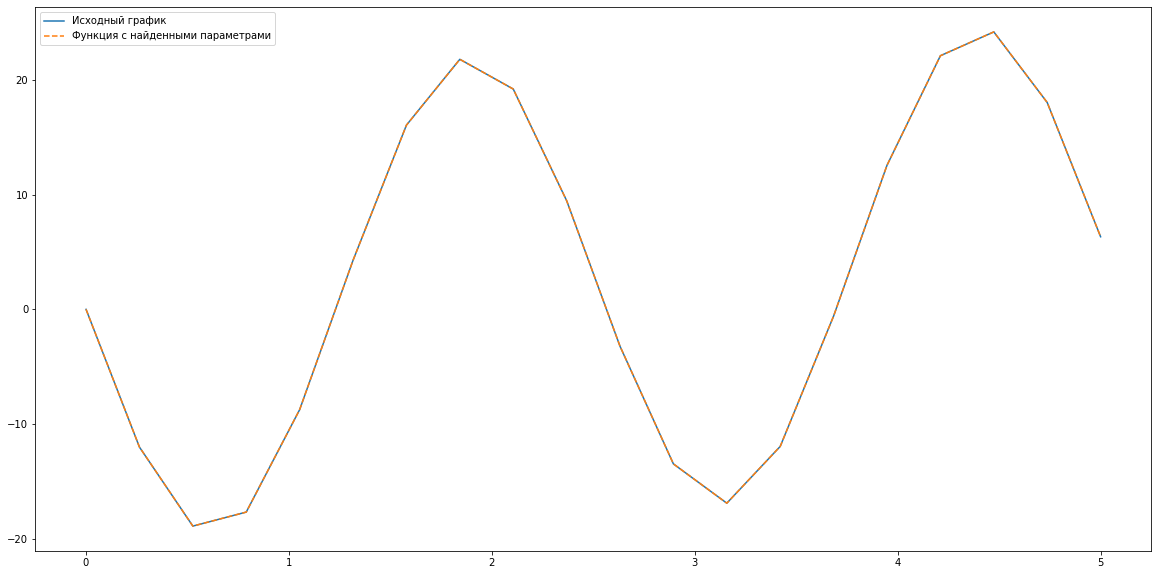

In [218]:
# Запишем функцию f1 c подставленными найденнми значениями параметров
def f1(x):
    return np.e**3 * np.sin(-2.5*x) + x

# Построим графики функций
plt.figure(figsize=(20, 10))
plt.plot(x, fx, label='Исходный график')
plt.plot(x, f1(x), label='Функция с найденными параметрами', linestyle='--')
plt.legend()
plt.show()

Графики абсолютно совпадают, значит мы правильно нашли значения **a** $ = 3$ и **b** $ = -2.5$, и при них функция **error** всегда будет равна $0$.

In [220]:
# Ну и чисто визуально сравним значения функции с теми, которые нам были даны - совпадают
f1(x)

array([  0.        , -12.01819073, -18.90968635, -17.6878658 ,
        -8.75291075,   4.27524498,  16.06801342,  21.81250211,
        19.2205984 ,   9.48411219,  -3.22273068, -13.48576482,
       -16.91096358, -11.95866839,  -0.5863007 ,  12.56873811,
        22.12489431,  24.20292139,  18.04522504,   6.33211092])

In [213]:
fx

array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

# Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [123]:
# С помощью функции numpy.random.randint зададим случайную величину с 20 значениями:
M  = np.random.randint(100, size=20)
M

array([ 0, 79,  9, 85, 13, 13, 45, 89,  9, 96, 33, 97, 78, 88, 18, 62, 67,
       59, 72, 29])

In [150]:
# С помощью функции numpy.random.choice будем из нашей случайной величины M генерировать выборки размера 50.
# Сделаем таких выборок 1000, для каждой из них с помощью функции numpy.mean вычислим среднее арифметическое, а из
# полученных средних арифметических создадим набор данных (список) mean
mean = []
for i in range(1000):
    selection = np.random.choice(M, size=50)
    mean.append(np.mean(selection))
len(mean)

1000

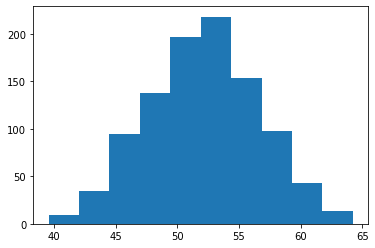

In [151]:
# Построим гистограмму распределения средних
plt.hist(mean)
plt.show()

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [144]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


Для начала найдем собственные векора матрицы "на бумаге".
<br>
Для этого решим уравнения:
$$
x+4y=\lambda x
$$ $$
x+y=\lambda y
$$        
Или 
$$
(1-\lambda)x+4y=0
$$ $$
x+(1-\lambda)y=0
$$
Тогда запишем характеристическое урванение:
$$
(1-\lambda)(1-\lambda)-4=0
$$
или
$$
\lambda^2-2\lambda-3=0
$$
Корни этого уравнения $\lambda _1 = 3$ и $\lambda _2 = -1$  являются искомыми собственными значениями матрицы $m$. 
<br>
Зная $\lambda$ решаем две системы уравнений:
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\begin {cases}
 x+4y=3x \\
x+y=3y
\end {cases}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;и &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\begin {cases}
 x+4y=-x \\
x+y=-y
\end {cases}$

Для первой системы уравнений (при $\lambda_1=3$) имеем решение $y = 0.5x$, задающее зависимость координат первого вектора. Вектор может быть, например, такой $\to (2, 1)$. Если его нормализовать, то получим: $\left( \frac{2}{\sqrt{5}},\frac{1}{\sqrt{5}}\right)$ &nbsp;&nbsp;&nbsp;или можно записать так &nbsp;&nbsp;&nbsp;$\binom{0.89442719}{0.4472136}$<br> 
Для второй системы уравнений (при $\lambda_2=-1$) имеем решение $y = -0.5x$, задающее зависимость координат второго вектора. Вектор может быть, например, такой $\to (-2, 1)$. Если его нормализовать, то получим: $\left(\frac{-2}{\sqrt{5}},\frac{1}{\sqrt{5}}\right)$ &nbsp;&nbsp;&nbsp;или можно записать так &nbsp;&nbsp;&nbsp;$\binom{-0.89442719}{0.4472136}$<br> 


In [148]:
# Проверим полученные вектора
v1 = np.array([2, 1])
print('При умножении матрицы m на вектор v1 получаем вектор ', m @ v1)

При умножении матрицы m на вектор v1 получаем вектор  [6 3]


In [149]:
v2 = np.array([-2, 1])
print('При умножении матрицы m на вектор v2 получаем вектор', m @ v2)

При умножении матрицы m на вектор v2 получаем вектор [ 2 -1]


In [145]:
# Проверим как решает задачу Python. Воспользуемся функцией np.linalg.eig
v, w = np.linalg.eig(m)
print(' Дана матрица m: \n', m)
print('Собственные значения матрицы m : ', v)
print('Собственные вектора матрицы m : \n', w)

 Дана матрица m: 
 [[1 4]
 [1 1]]
Собственные значения матрицы m :  [ 3. -1.]
Собственные вектора матрицы m : 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Т.о. мы получили идентичные результаты. Значит расчет собчтвенных векторов "на бумаге" был произведен верно.